<a href="https://colab.research.google.com/github/timothythampy/Machine-Learning/blob/master/Experiment_6/ML_Experiment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv
 
train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

--2020-08-30 19:07:27--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  64.8MB/s    in 0.2s    

2020-08-30 19:07:28 (64.8 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-30 19:07:28--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

In [8]:
print('Train 1 Shape: ', train1.shape)
print('Train 2 Shape: ', train2.shape)
print('Train 3 Shape: ', train3.shape)

Train 1 Shape:  (96498, 17)
Train 2 Shape:  (96498, 20)
Train 3 Shape:  (96498, 2)


In [9]:

train1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train1['index'] = train1['index'] + 1
train1.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [10]:
train2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train2.head()

,index,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [11]:
train3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train3.head()

,index,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   96498 non-null  int64  
 1   0       96498 non-null  float64
 2   1       96498 non-null  float64
 3   2       96498 non-null  float64
 4   3       96498 non-null  float64
 5   4       96498 non-null  float64
 6   5       96498 non-null  float64
 7   6       96498 non-null  float64
 8   7       96498 non-null  float64
 9   8       96498 non-null  float64
 10  9       96498 non-null  float64
 11  10      96498 non-null  float64
 12  11      96498 non-null  float64
 13  12      96498 non-null  float64
 14  13      96498 non-null  float64
 15  14      96498 non-null  float64
 16  15      96498 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 12.5 MB


In [13]:
train1.nunique()

index    96498
0         1346
1        91076
2            1
3            6
4        91097
5          544
6        91130
7            1
8          118
9        88871
10       91233
11       91135
12           1
13           1
14       90486
15       91001
dtype: int64

In [14]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            96498 non-null  int64  
 1   txsize           96498 non-null  int64  
 2   txvirtualsize    96498 non-null  int64  
 3   txinputs_count   96498 non-null  int64  
 4   txoutputs_count  96498 non-null  int64  
 5   txinput_val      96498 non-null  float64
 6   txoutput_val     96498 non-null  float64
 7   txfee            96498 non-null  int64  
 8   Min_received     96498 non-null  float64
 9   Max_received     96498 non-null  float64
 10  Avg_received     96498 non-null  float64
 11  Total_received   96498 non-null  float64
 12  Stdev_received   96498 non-null  float64
 13  Var_received     96498 non-null  float64
 14  Min_sent         96498 non-null  float64
 15  Max_sent         96498 non-null  float64
 16  Avg_sent         96498 non-null  float64
 17  Total_sent  

In [15]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   96498 non-null  int64 
 1   label   96498 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
results = pd.merge(train3, train1, on='index', how='inner')

# split data into X and y
X = results.iloc[:,2:18]
Y1 = results['label']

In [17]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(results['label'].unique())
Y_dummies = pd.get_dummies(Y1)
#Y_tranform = le.transform(Y)
#Y = pd.DataFrame(Y_transform)
Y = Y_dummies
Y

,donations,exchange,mixer,paymentgateway,unclassified,wallets
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
96493,1,0,0,0,0,0
96494,1,0,0,0,0,0
96495,1,0,0,0,0,0
96496,0,1,0,0,0,0


In [18]:

seed = 7
test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(57898, 16)
(19300, 16)
(19300, 16)
(57898, 6)
(19300, 6)
(19300, 6)


In [19]:
from keras import models
from keras import layers
nn=models.Sequential()


nn.add(layers.Dense(1024,activation = "relu",input_shape=(16,))) 
nn.add(layers.Dense(512,activation='tanh'))
nn.add(layers.Dense(6,activation='softmax'))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              17408     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 3078      
Total params: 545,286
Trainable params: 545,286
Non-trainable params: 0
_________________________________________________________________


In [20]:

nn.compile(optimizer='sgd',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [21]:
history = nn.fit(x_train, y_train,batch_size=128,epochs =100,validation_data=(x_val, y_val))

Epoch 1/100
453/453 [==============================] - 2s 3ms/step - loss: 0.6439 - accuracy: 0.8312 - val_loss: 0.6466 - val_accuracy: 0.8347
Epoch 2/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6368 - accuracy: 0.8331 - val_loss: 0.6361 - val_accuracy: 0.8347
Epoch 3/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6370 - accuracy: 0.8331 - val_loss: 0.6771 - val_accuracy: 0.8347
Epoch 4/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6373 - accuracy: 0.8331 - val_loss: 0.6507 - val_accuracy: 0.8347
Epoch 5/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6365 - accuracy: 0.8331 - val_loss: 0.6679 - val_accuracy: 0.8347
Epoch 6/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6371 - accuracy: 0.8331 - val_loss: 0.6373 - val_accuracy: 0.8347
Epoch 7/100
453/453 [==============================] - 1s 3ms/step - loss: 0.6372 - accuracy: 0.8331 - val_loss: 0.6652 - val_accuracy: 0.8347

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

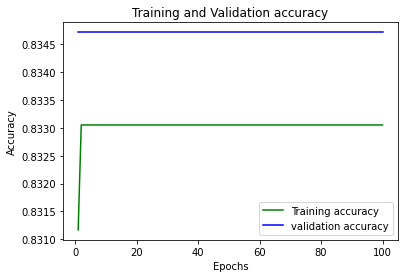

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:

train_loss,train_accuracy = nn.evaluate(x_train,y_train)
val_loss,val_accuracy = nn.evaluate(x_val,y_val)
test_loss,test_accuracy = nn.evaluate(x_test,y_test)
print('Training Accuracy : ',train_accuracy*100,"%")
print('Val Accuracy : ',val_accuracy*100,"%")
print('Test Accuracy : ',test_accuracy*100,"%")

604/604 [==============================] - 1s 2ms/step - loss: 0.6364 - accuracy: 0.8338
Training Accuracy :  83.30512046813965 %
Val Accuracy :  83.47150087356567 %
Test Accuracy :  83.3834171295166 %
